In [56]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
from typing import List, Iterable

# Using an extended version of Karpathy's micrograd library to work with gradients. Thanks Andrej!  
from micrograd.engine import Value

In [57]:
# Set target values for the regression and generate data around them
np.random.seed(2023)
rng = np.random.default_rng(2023)

class_size = 150

X1_red = rng.normal(loc=4.0, scale=2.0, size=class_size)
X2_red = rng.normal(loc=10.0, scale=2.0, size=class_size)

X1_blue = rng.normal(loc=12.0, scale=2.0, size=class_size)
X2_blue = rng.normal(loc=4.0, scale=2.0, size=class_size)

X1_green = rng.normal(loc=4.0, scale=2.0, size=class_size)
X2_green = rng.normal(loc=4.0, scale=2.0, size=class_size)

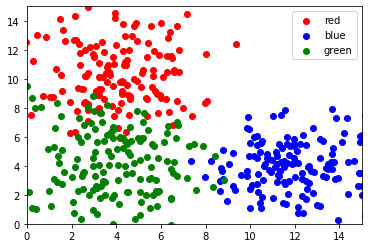

In [58]:
plt.scatter(X1_red, X2_red, c='red')
plt.scatter(X1_blue, X2_blue, c='blue')
plt.scatter(X1_green, X2_green, c='green')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.legend(['red', 'blue', 'green'])
plt.show()

In [59]:
labels = np.array(['red'] * class_size + ['blue'] * class_size + ['green'] * class_size)

red_features = np.hstack([X1_red.reshape(class_size, 1), X2_red.reshape(class_size, 1)])
blue_features = np.hstack([X1_blue.reshape(class_size, 1), X2_blue.reshape(class_size, 1)])
green_features = np.hstack([X1_green.reshape(class_size, 1), X2_green.reshape(class_size, 1)])

data = np.concatenate([red_features, blue_features, green_features])
data.shape

(450, 2)

In [60]:
data[0]

array([ 5.20344259, 10.64416154])

In [61]:
labels[0]

'red'

In [63]:
class KNNClassifier():
    def __init__(self, 
                 k: int,
                 data: np.array,
                 labels: np.array):
        self.k = k
        self.data = data
        self.labels = labels
        
    def dist(self,
             coords1: Iterable,
             coords2: Iterable):
        assert len(coords1) == len(coords2)
        return np.sum([(coords1[i] - coords2[i])**2 for i in range(len(coords1))])
    
    def predict(self,
                sample: Iterable):
        distances = [] 
        for idx, item in enumerate(self.data):
            distances.append((idx, self.dist(item, sample))) 
        distances.sort(key=lambda x: x[1])
        k_indices = [x[0] for x in distances[:self.k]]
        k_labels = self.labels[k_indices]
        pred = mode(k_labels)
        return pred

In [64]:
knn = KNNClassifier(k=3, data=data, labels=labels)

In [71]:
knn.predict([12, 4]), knn.predict([4, 4]), knn.predict([4, 12])

('blue', 'green', 'red')